In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_excel('data.xlsx')
data.describe()

,A,B,C,D,E,F,G,H
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,51.346173,16.750375,50.201101,0.505593,4.445723,3.983492,69.677839,50.566283
std,29.072314,7.853655,28.778443,0.291200,2.286954,2.630427,17.445102,28.625441
min,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,40.000000,1.000000
25%,26.000000,10.000000,25.000000,0.260000,2.000000,2.000000,54.000000,26.000000
50%,52.000000,17.000000,49.000000,0.510000,4.000000,4.000000,69.000000,51.000000
75%,77.000000,24.000000,75.000000,0.760000,6.000000,6.000000,85.000000,76.000000
max,100.000000,30.000000,100.000000,1.000000,8.000000,8.000000,100.000000,100.000000


In [3]:
data.head()

,A,B,C,D,E,F,G,H,J
0,55,16,84,0.98,3,6,91,8,С
1,81,5,71,0.81,2,1,98,43,С
2,99,28,48,0.81,3,0,41,12,С
3,61,13,23,0.70,2,1,84,87,С
4,95,17,81,0.10,5,3,83,21,С


In [4]:
pd.isnull(data).any()

A    False
B    False
C    False
D    False
E    False
F    False
G    False
H    False
J    False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1999 non-null   int64  
 1   B       1999 non-null   int64  
 2   C       1999 non-null   int64  
 3   D       1999 non-null   float64
 4   E       1999 non-null   int64  
 5   F       1999 non-null   int64  
 6   G       1999 non-null   int64  
 7   H       1999 non-null   int64  
 8   J       1999 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 140.7+ KB


In [6]:
data.corr()

,A,B,C,D,E,F,G,H
A,1.000000,-0.030389,0.011359,0.061473,0.005417,0.004244,-0.005922,-0.025291
B,-0.030389,1.000000,-0.054295,-0.072169,0.004164,-0.020744,0.018255,-0.032810
C,0.011359,-0.054295,1.000000,0.007989,0.027254,0.022153,-0.007580,0.001163
D,0.061473,-0.072169,0.007989,1.000000,0.003289,0.004224,0.059137,-0.020803
E,0.005417,0.004164,0.027254,0.003289,1.000000,0.028596,-0.007702,-0.007252
F,0.004244,-0.020744,0.022153,0.004224,0.028596,1.000000,0.004181,-0.048838
G,-0.005922,0.018255,-0.007580,0.059137,-0.007702,0.004181,1.000000,0.038758
H,-0.025291,-0.032810,0.001163,-0.020803,-0.007252,-0.048838,0.038758,1.000000


In [7]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

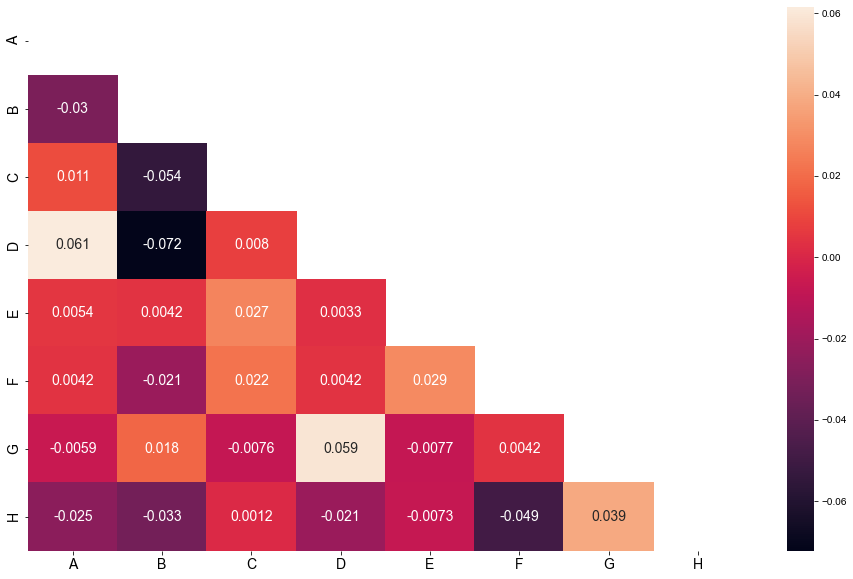

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot = True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [9]:
def interpritator(val, low_start=None, low_end=None, med_start=None,med_end=None, top_start=None,top_end=None):
    result = None
    #81 60
    if low_start == 81:
        if low_start <= val or val <=low_end:
            result = 0.7
        elif med_start <= val <=med_end:
            result = 1
        elif top_start <= val <=top_end:
            result = 1.3
        return result
    if low_start <= val <=low_end:
        result = 0.7
    elif med_start <= val <=med_end:
        result = 1
    elif top_start <= val <=top_end:
        result = 1.3
    return result

In [10]:
def points(row):
    mas = []
    mas.append(interpritator(row[1][0],
                   0, 50,
                   51, 75,
                   76, 100))
    mas.append(interpritator(row[1][1],
                   10, 9999,
                   7, 9,
                   0, 7))
    mas.append(interpritator(row[1][2],
                   0, 70,
                   71, 85,
                   86, 100))
    mas.append(interpritator(row[1][3],
                   0, 0.59,
                   0.6, 0.74,
                   0.75, 1))
    mas.append(interpritator(row[1][4],
                   3, 9999,
                   2, 2,
                   1, 1))
    mas.append(interpritator(row[1][5],
                   4, 9999,
                   1, 3,
                   0, 0))
    mas.append(interpritator(row[1][6],
                   81, 60,
                   61, 70,
                   71, 80))
    mas.append(interpritator(row[1][7],
                   1, 13,
                   14, 32,
                   33, 100))
    mas.append(interpritator(row[1][8],
                   'Т', 'Т',
                   'С', 'С',
                   'Ф', 'Ф'))

    return mas

In [18]:
points_col =[]
# count = 0
for row in data.iterrows():
#     count +=1
#     if count >30:
#         break
    mas_point = points(row)
#     print(mas_point)
    result_summ = mas_point[0]*0.25 + mas_point[1]*0.2 + mas_point[2]*0.15 + mas_point[3]*0.1 + mas_point[4]*0.1 + mas_point[5]*0.05 + mas_point[6]*0.05 +mas_point[7]*0.05 + mas_point[8]*0.05
    result_summ = result_summ*100/1.3
    points_col.append(result_summ)
data_with_point = pd.DataFrame({'A':data['A'],
              'B':data['B'],
              'C':data['C'],
              'D':data['D'],
              'E':data['E'],
              'F':data['F'],
              'G':data['G'],
              'H':data['H'],
              'J':data['J'],
              'Points':points_col})
data_with_point

,A,B,C,D,E,F,G,H,J,Points
0,55,16,84,0.98,3,6,91,8,С,68.846154
1,81,5,71,0.81,2,1,98,43,С,89.615385
2,99,28,48,0.81,3,0,41,12,С,73.461538
3,61,13,23,0.70,2,1,84,87,С,68.846154
4,95,17,81,0.10,5,3,83,21,С,72.307692
...,...,...,...,...,...,...,...,...,...,...
1994,65,13,36,0.30,8,0,70,85,Т,65.384615
1995,57,8,54,0.44,6,2,58,22,Т,66.538462
1996,12,29,89,0.68,4,7,56,79,Т,65.384615
1997,99,15,45,0.88,4,0,76,59,Т,76.923077


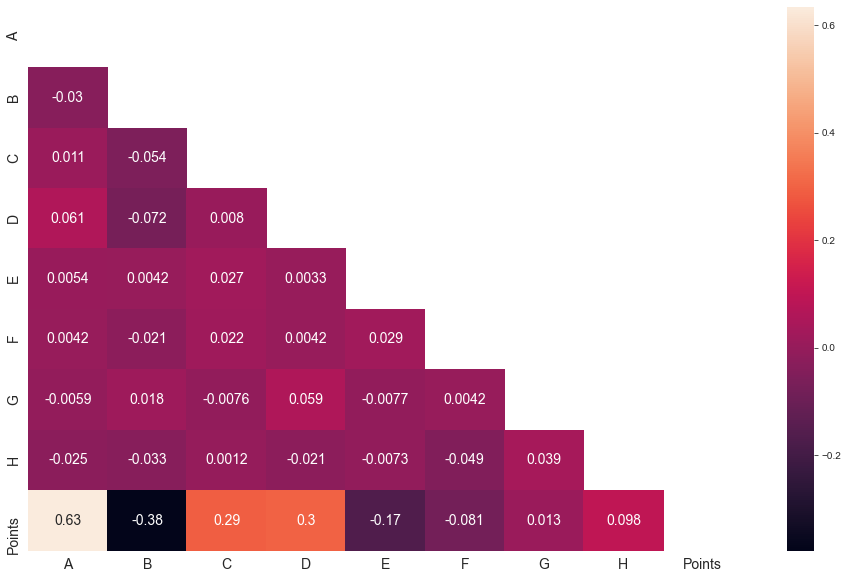

In [19]:
mask = np.zeros_like(data_with_point.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
sns.heatmap(data_with_point.corr(), mask=mask, annot = True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [21]:
writer = pd.ExcelWriter('data_with_point.xlsx', engine='xlsxwriter')
data_with_point.to_excel(writer,'sheet1')
writer.save()